In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(66)   #seed 函数保留种子，以便重新运行时，随机数不变
x=2*np.random.random(size=100)
y=x*3.+4.+np.random.normal(size=100)

In [3]:
x


array([0.30857516, 0.26739912, 0.72537093, 1.35821775, 0.38890011,
       0.50242077, 1.51683278, 1.11523718, 1.02960584, 0.93559972,
       0.17435201, 1.65819088, 0.59728112, 0.06269178, 1.35601151,
       1.80697807, 1.02890237, 1.07821095, 1.32865503, 1.26811351,
       0.70683894, 0.05328503, 0.33057968, 1.75863798, 0.13564091,
       0.7381716 , 0.23100117, 0.19258829, 0.1675394 , 0.17385405,
       0.04451169, 1.54208544, 0.09842525, 0.93044648, 1.88246613,
       0.43302461, 0.72263693, 0.06263726, 0.60808907, 0.37653535,
       0.25231926, 0.82843367, 1.8893422 , 0.07668703, 1.91408018,
       0.25263162, 0.1558952 , 0.33216602, 1.9095358 , 0.53612251,
       0.20108188, 1.81555236, 1.10674936, 1.49738524, 0.21344696,
       1.57282878, 1.31755546, 0.72391313, 1.29970958, 0.4610867 ,
       1.43371702, 0.53224281, 1.24559233, 1.6286177 , 0.07875057,
       1.18252429, 0.64277566, 1.02283256, 1.00681168, 0.62212791,
       1.81596165, 0.54830525, 1.63735236, 1.10556513, 1.29417

In [4]:
y

array([ 3.11725437,  5.28827477,  5.77892206,  7.77341059,  4.71472072,
        7.65299045,  8.22513611,  8.2832634 ,  7.64683806,  7.19033974,
        4.49236113,  7.35580306,  6.23169071,  4.6221855 ,  6.65892661,
        9.83731115,  5.36421206,  6.97515741,  9.02896846,  9.45800369,
        5.20374744,  2.94481497,  3.75345729, 11.07519777,  4.82581679,
        4.91175576,  5.52983867,  4.63220263,  4.40803951,  4.18434377,
        2.40098633,  8.41233406,  4.39638416,  7.81951197,  9.39617717,
        5.18186303,  6.98524303,  4.07873908,  5.71574187,  4.70521653,
        5.55633383,  5.87172825, 10.40179711,  5.06170612,  8.40267038,
        5.4004198 ,  4.3565488 ,  4.40660224, 10.54258565,  5.86707894,
        6.39029284, 10.04668138,  7.52198287,  9.23110931,  4.16564275,
        8.67875716,  7.63690732,  8.25198409,  9.0920277 ,  4.51372108,
       10.09449316,  6.10935732,  7.68209042,  8.5157148 ,  4.65097121,
        7.30581352,  6.80919945,  9.00530477,  6.51934472,  3.87

In [5]:
x=x.reshape(-1,1)

In [6]:
x.shape

(100, 1)

In [7]:
y.shape

(100,)

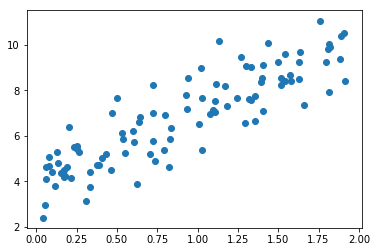

In [8]:
plt.scatter(x,y)     ###

scatter函数用于绘制散点图。
matplotlib.pyplot.scatter(x,y,s=20,c='b',maker='o',cmpa=None,norm=None,vmin=None,vax=None,alpha=None,linewidths=None,verts=None,hole=None)
函数中各个参数介绍:
x,y是相同长度的数组。
s可以是标量，或者与x,y长度相同的数组，表明散点的大小。默认20
c，即color，是点的颜色。颜色参数如下：b-blue   c-cyan  g-greeen  k-black  m-magenta  r-red  w-white  y-yellow
marker 是散点的形状。其属性较多，. -点  o-圆圈  ，-像素  v-倒三角  *-星星

In [9]:
def J(theta,x_b,y):
    try:
        return  ((y-x_b.dot(theta))**2)/len(x_b)                         
#np.dot(A, B)：对于二维矩阵，计算真正意义上的矩阵乘积，同线性代数中矩阵乘法的定义。对于一维矩阵，计算两者的内积
    except:
        return float('inf')

In [10]:
def dJ(theta,x_b,y):      #dot函数矩阵乘
    res=np.empty(len(theta))  
    #empty一样,它所常见的数组内所有元素均为空
    res[0]=np.sum(x_b.dot(theta)-y)
    for i in range(1,len(theta)):
        res[i]=(x_b.dot(theta)-y).dot(x_b[:,1])
    return res*2/len(x_b)

In [11]:
def gradient_descent(x_b ,y , initial_theta , eta, n_iters=1e4):
    theta=initial_theta 
    i_iter=0
    esplion=1e-8
    
    while i_iter<n_iters:
        gradient=dJ(theta,x_b,y)
        last_theta=theta
        theta=theta-eta * gradient  ###迭代 让theta每次都能向导数的负方向移一步

        if(abs((J(last_theta,x_b,y)-J(theta,x_b,y)).any())<esplion):
              break
        i_iter+=1
    return theta

In [12]:
x_b=np.hstack([np.ones((len(x),1)),x.reshape(-1,1)])
initial_theta=np.zeros(x_b.shape[1])
eta=0.01

theta=gradient_descent(x_b, y, initial_theta, eta)

Numpy对逻辑表达式判别不清楚，它可以返回False如果等号两边两个式子是数值相等，也可以返回True因为等号两边两个式子是逻辑相等。它觉得这是模棱两可的，因此放弃做判断，统一用a.any()进行或比较，或a.all()进行与比较。可以从下面例子体会一下。

import numpy as numpy

a=np.zeros(3)

a[0]=0; a[1]=1; a[2]=2

print (a-[0,1,2]).any()	#[0,0,0] False

print (a-[0,1,2]).all()	#[0,0,0] False

print (a-[1,2,3]).any() #[-1,-1,-1] True

print (a-[1,2,3]).all() #[-1,-1,-1] True

print (a-[0,2,3]).any() #[0,-1,-1] True

print (a-[0,2,3]).all() #[0,-1,-1] False

numpy-array数组进行(a-b)比较时，True表示不同，False表示相同

部分元素相等，.all()返False（一帮情况下不希望出现），.any()返回True; 所有元素都相等，二者均返回False

因此最好使用.any()比较

In [13]:
theta

array([4.00361994, 3.09666675])

# 测试封装我们的线性回归算法

In [14]:
import sys
sys.path.append("F:/PYCode")####假如模块搜索的路径
from machine_learning.LinearRegression import LinearRegression

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit_gradient(x,y)

LinearRegression()

In [17]:
lin_reg._theta

array([4.00361994, 3.09666675])

# 梯度下降法的向量化

In [18]:
from machine_learning.model_selection import train_test_split
from  sklearn import datasets

In [19]:
boston = datasets.load_boston()
x= boston.data
y = boston.target

x1 = x[y<50.0]
y1 = y[y<50.0]

In [20]:
x_train,y_train,x_test,y_test=train_test_split(x1,y1)

In [21]:
x_train[:10,:]

array([[1.40520e-01, 0.00000e+00, 1.05900e+01, 0.00000e+00, 4.89000e-01,
        6.37500e+00, 3.23000e+01, 3.94540e+00, 4.00000e+00, 2.77000e+02,
        1.86000e+01, 3.85810e+02, 9.38000e+00],
       [8.87300e-02, 2.10000e+01, 5.64000e+00, 0.00000e+00, 4.39000e-01,
        5.96300e+00, 4.57000e+01, 6.81470e+00, 4.00000e+00, 2.43000e+02,
        1.68000e+01, 3.95560e+02, 1.34500e+01],
       [4.55587e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.18000e-01,
        3.56100e+00, 8.79000e+01, 1.61320e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.54700e+02, 7.12000e+00],
       [1.42310e-01, 0.00000e+00, 1.00100e+01, 0.00000e+00, 5.47000e-01,
        6.25400e+00, 8.42000e+01, 2.25650e+00, 6.00000e+00, 4.32000e+02,
        1.78000e+01, 3.88740e+02, 1.04500e+01],
       [3.61500e-02, 8.00000e+01, 4.95000e+00, 0.00000e+00, 4.11000e-01,
        6.63000e+00, 2.34000e+01, 5.11670e+00, 4.00000e+00, 2.45000e+02,
        1.92000e+01, 3.96900e+02, 4.70000e+00],
       [4.15292e+01, 0.00000e+

In [22]:
lin=LinearRegression()

In [23]:
%time lin.fit_gradient(x_train,y_train,eta=0.000001,n_iters = 1e6)

Wall time: 36.8 s


LinearRegression()

In [24]:
lin.score(x_test,y_test)

0.6260547504710999

In [25]:
lin._theta

array([ 0.42886904, -0.09645924,  0.05396392, -0.09764766,  0.07749642,
        0.2013657 ,  3.92855009,  0.01590937, -0.32823714,  0.10268746,
       -0.00745236, -0.04205977,  0.01580074, -0.41044923])

# 梯度下降法和数据归一化

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
stand =  StandardScaler()
stand.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [28]:
x_train_stand = stand.transform(x_train)

In [29]:
lin3 = LinearRegression()

In [30]:
%time lin3.fit_gradient(x_train_stand,y_train)

Wall time: 383 ms


LinearRegression()

In [31]:
x_test_stand = stand.transform(x_test)

In [32]:
lin3.score(x_test_stand, y_test)

0.7082750164666909

# 梯度下降法的优势

In [33]:
m =1000
n =5000
from machine_learning.LinearRegression import LinearRegression

In [47]:
big_x =np.random.normal(size=(m,n))

In [48]:
true_theta = np.random.uniform(0.0,100.0,size=n+1)
big_y = big_x.dot(true_theta[1:])+true_theta[0]+np.random.normal(0., 10.,size=m)

In [49]:
big_regl = LinearRegression()
%time big_regl.fit_normal(big_x,big_y)

Wall time: 7.31 s


LinearRegression()

In [50]:
big_r = LinearRegression()
%time big_r.fit_gradient(big_x,big_y)

Wall time: 2min 35s


LinearRegression()